# Asset Swap Spread and Option Adjusted Spread

In [3]:
import sys
sys.path.append("..")
sys.path.append("..\\..")

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from financepy.finutils.FinError import FinError
from financepy.finutils.FinFrequency import FinFrequencyTypes
from financepy.finutils.FinDayCount import FinDayCountTypes
from financepy.finutils.FinDate import FinDate
from financepy.products.bonds.FinBond import FinBond, FinYieldConventions

In [5]:
maturityDate = FinDate(2027, 5, 15)
coupon = 0.02375
freqType = FinFrequencyTypes.SEMI_ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA
face = 100.0 # By setting the face to 100 we expect a price of par to be 100.0

In [6]:
bond = FinBond(maturityDate, coupon, freqType, accrualType, face)

In [7]:
cleanPrice = 99.780842  # if face is 1 then this must be 0.99780842

In [10]:
settlementDate = FinDate(2017, 7, 21)

In [11]:
bond.print()

Maturity Date: SAT 15 MAY 2027
Coupon: 0.02375
Frequency: FinFrequencyTypes.SEMI_ANNUAL
Accrual Type: FinDayCountTypes.ACT_ACT_ICMA
Face: 100.0


## Asset Swap Spread

To calculate the asset swap spread we need a Libor reference curve. I just create a simple flat curve.

In [23]:
from financepy.market.curves.FinFlatCurve import FinFlatCurve

In [33]:
liborFlatRate = 0.0275

In [34]:
liborFlatCurve = FinFlatCurve(settlementDate, liborFlatRate, 2)

In [35]:
bond.assetSwapSpread(settlementDate, cleanPrice, liborFlatCurve) * 10000

-33.67080535984256

To get date functionality you import FinDate

## Analysis of the Asset Swap Spread

We can use the vectorisations to do some basic analysis. First generate a vector of prices from 90 to 110 with 20 steps.

In [46]:
cleanPrices = np.linspace(75,125,20)

In [47]:
asws = bond.assetSwapSpread(settlementDate, cleanPrices, liborFlatCurve)

We can now plot the relationship.

Text(0, 0.5, 'Asset Swap Spread (bp)')

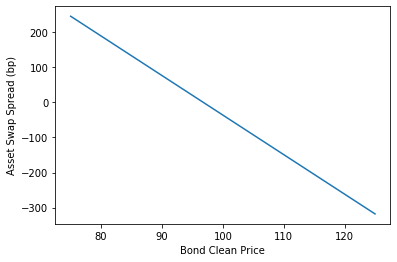

In [48]:
plt.plot(cleanPrices,asws*10000)
plt.xlabel("Bond Clean Price")
plt.ylabel("Asset Swap Spread (bp)")

This is nicely linear and decreasing - the higher the bond price the better its implied credit risk versus Libor discounting so the lower its asset swap spread.

## Asset Swap Spread Versus Discount Rate

In [49]:
liborFlatRates = np.linspace(0.01,0.04,20)

In [50]:
liborFlatCurves = FinFlatCurve(settlementDate, liborFlatRates, 2)

In [51]:
asws = bond.assetSwapSpread(settlementDate, cleanPrice, liborFlatCurves)

Text(0, 0.5, 'Asset Swap Spread (bp)')

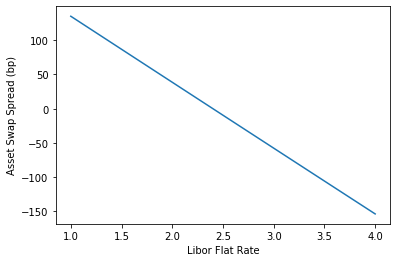

In [53]:
plt.plot(liborFlatRates*100,asws*10000)
plt.xlabel("Libor Flat Rate")
plt.ylabel("Asset Swap Spread (bp)")

Once again we see that the asset swap spread which measures the risk of the bond versus the Libor rate falls linearly with the increasing Libor rate.

## Option Adjusted Spread

OAS is similar but actually subtly different measure of credit spread with a different definition and compounding frequency. Let's see how it compares to the asset swap spread.

In [54]:
oass = bond.optionAdjustedSpread(settlementDate, cleanPrices, liborFlatCurve)

We plot them both as a function of the Bond clean price.

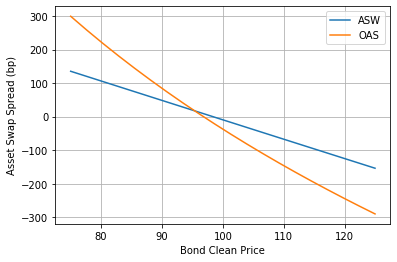

In [55]:
plt.plot(cleanPrices,asws*10000, label="ASW")
plt.plot(cleanPrices,oass*10000, label="OAS")
plt.xlabel("Bond Clean Price")
plt.ylabel("Asset Swap Spread (bp)")
plt.legend()
plt.grid()